In [197]:
# USE CASE 1: BOOK 1 

'''
Sigmund Freud: Obras Completas. Pag 20-21 
Improve imaging preprocess  
'''

'\nSigmund Freud: Obras Completas. Pag 20-21 \nImprove imaging preprocess  \n'

In [253]:
import cv2
import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [266]:
# PREPROCESSING IMAGES 

import numpy as np
import cv2

def preprocess_image(img, dict_preprocessing):
    
    img = np.array(img)

    # Rescale the image, if needed.
    if resizing_method not None: 
        img = resizing_image(img, resizing_method)    
        img_show = Image.fromarray(img, 'RGB')
        display(img_show)
    
    if crop_image not None:
        # Crop the areas where provision number is more likely present
        img = crop_image(img, pnr_area[0], pnr_area[1], pnr_area[2], pnr_area[3])


    # Apply blurring 
    if blurring_method not None: 
        img = blurring_image(img, blurring_method)
        img_show = Image.fromarray(img, 'RGB')
        display(img_show)

    
    # Threshold image 
    if thresholding_method not None: 
        img = thresholding_image(img, thresholding_method)
    
# Convert to gray
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    #kernel = np.ones((1, 1), np.uint8)
    #img = cv2.dilate(img, kernel, iterations=1)
    #img = cv2.erode(img, kernel, iterations=1)
    # Apply threshold to get image with only b&w (binarization)
    #img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return img

In [281]:
   
def resizing_image(img, argument):
    '''
    1: Shrink 
    2: Enlarge Cubic
    3: Enlager Linear   
    '''
    switcher = {
        1: cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA), 
        2: cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),
        3: cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    }
    return switcher.get(argument, "Invalid method")

In [1]:
def threshold_image(img, thresholding_mode): 
    '''
    # 1. Binary-Otsu w/ Gaussian Blur (kernel size = 9)                               #
    # 2. Binary-Otsu w/ Gaussian Blur (kernel size = 7)                               #
    # 3. Binary-Otsu w/ Gaussian Blur (kernel size = 5)                               #
    # 4. Binary-Otsu w/ Median Blur (kernel size = 5)                                 #
    # 5. Binary-Otsu w/ Median Blur (kernel size = 3)                                 #
    # 6. Adaptive Gaussian Threshold (31,2) w/ Gaussian Blur (kernel size = 5)        #
    # 7. Adaptive Gaussian Threshold (31,2) w/ Median Blur (kernel size = 5)    
    '''
    
    switcher = {
        1: cv2.threshold(cv2.GaussianBlur(img, (9, 9), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        2: cv2.threshold(cv2.GaussianBlur(img, (7, 7), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        3: cv2.threshold(cv2.GaussianBlur(img, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        4: cv2.threshold(cv2.medianBlur(img, 5), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        5: cv2.threshold(cv2.medianBlur(img, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
        6: cv2.adaptiveThreshold(cv2.GaussianBlur(img, (5, 5), 0), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
        7: cv2.adaptiveThreshold(cv2.medianBlur(img, 3), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2),
    }
    return switcher.get(argument, "Invalid method")

In [269]:
# TESSERACT MAIN 

# Tesseract

# Convert document from pdf to image https://stackoverflow.com/questions/29657237/tesseract-ocr-pdf-as-input
import cv2
import pdf2image
import numpy as np
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract


def pdf_to_img(pdf_file, FIRST_PAGE, LAST_PAGE):
    return pdf2image.convert_from_path(pdf_file, first_page= FIRST_PAGE, last_page=LAST_PAGE)

def ocr_core(file):
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
    text = pytesseract.image_to_string(file, lang='spa')
    return text


In [270]:
# book_path = 'C:/Users/Hp/OneDrive/Escritorio/libro_1.pdf'
# print_pages(book_path)

In [271]:
# Show the sample images that we will work on (Need to create a folder to upload sample images in Colab environment)
txt_testing = os.listdir('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data')
txt_testing = sorted(txt_testing)
txt_testing = [doc for doc in txt_testing if '.txt' in doc] 

In [272]:
pdf_list = os.listdir('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data')
pdf_list = sorted(pdf_list)
pdf_list = [doc for doc in pdf_list if '.pdf' in doc] 

In [273]:
pdf_list 
pdf_list = ['libro_1.pdf']

In [274]:
pdf_dict = {
'libro_1.pdf': {'first_page': 20, 'last_page': 21, 'sample': 'libro_1_sample.txt'},
}

In [275]:
# Create empty dataframe to store output
df_output = pd.DataFrame(columns = ['pdf_filename', 'sample_filename', 'txt_reference', 'ocr_output', 'cer', 'wer'])

In [276]:
df_output['pdf_filename'] = pdf_list

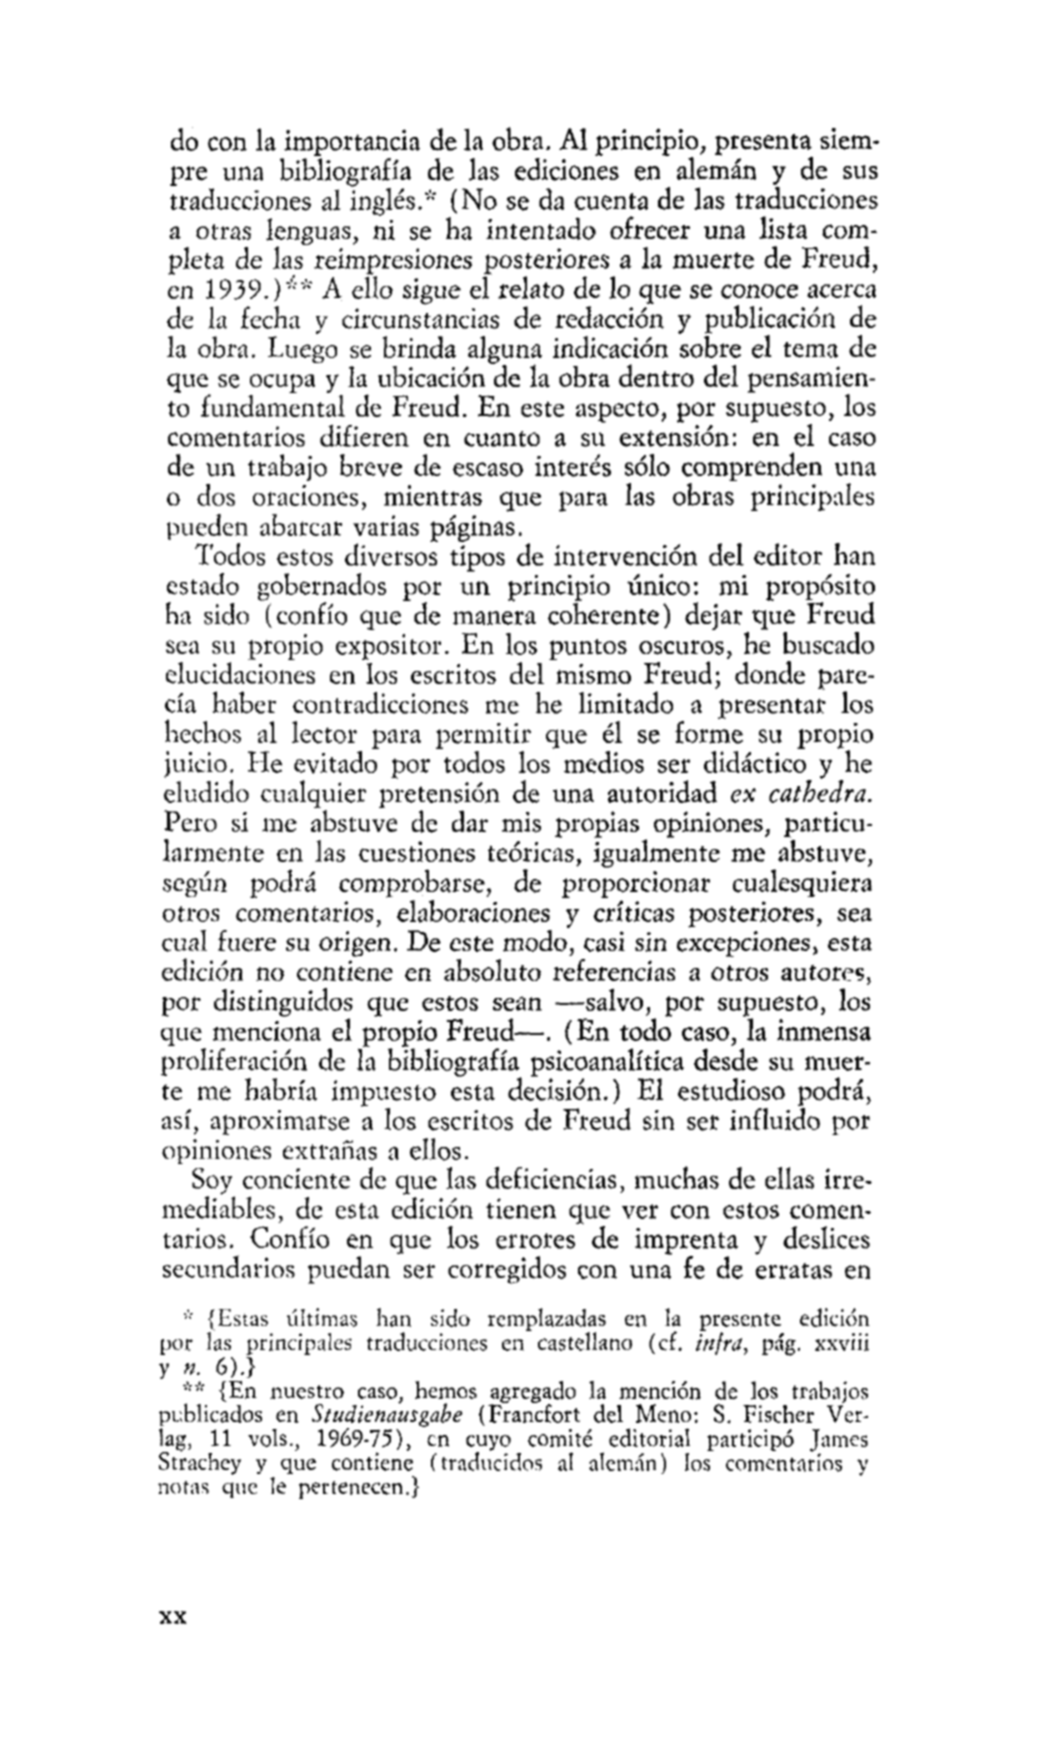

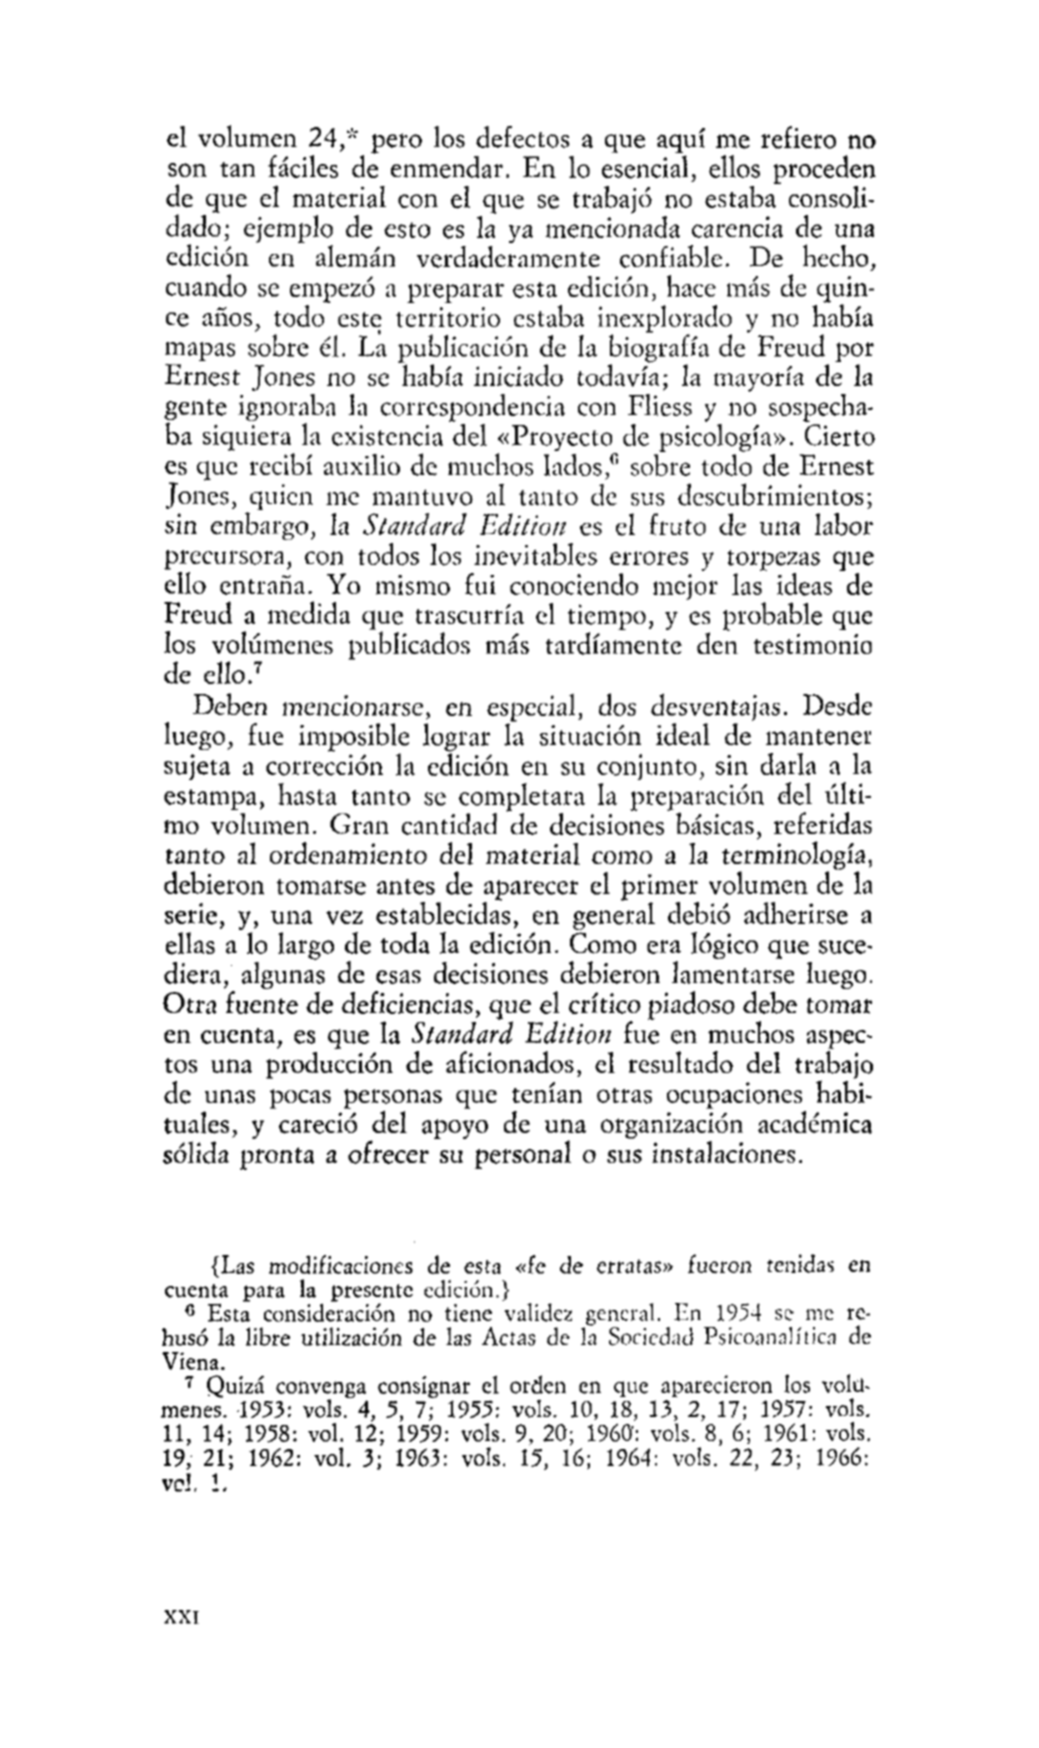

In [280]:
for num, pdf in enumerate(pdf_list):
    first_page = pdf_dict[pdf]['first_page']
    last_page = pdf_dict[pdf]['last_page']
    images = pdf_to_img('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data/' + pdf, first_page, last_page)
    with open('C:/Users/Hp/PycharmProjects/ImageToTextArgentina/data/' + pdf_dict[pdf]['sample'],  'r', encoding='utf-8') as f :
        reference_text = f.read()
    output_text = ''
    pnr_area = [150, 450, 1600, 1150]
    for pg, img in enumerate(images):
        img = preprocess_image(img)
        output_aux_text = ocr_core(img)
        output_text += output_aux_text
        #print(pdf)
        #print(img)
        #print(output_aux_text)
    output_text = output_text.replace("\n", "")
    output_text = output_text.replace("-\n", "")
    reference_text = reference_text.replace("\n", "")
    reference_text = reference_text.replace("-\n", "")
    cer = fastwer.score_sent(output_text, reference_text, char_level=True)
    wer = fastwer.score_sent(output_text, reference_text, char_level=False)
    df_output.loc[df_output['pdf_filename'] == pdf, 'sample_filename'] = pdf_dict[pdf]['sample']
    df_output.loc[df_output['pdf_filename'] == pdf, 'txt_reference'] = reference_text[0:200]
    df_output.loc[df_output['pdf_filename'] == pdf, 'ocr_output'] = output_text[0:200]
    df_output.loc[df_output['pdf_filename'] == pdf, 'cer'] = cer
    df_output.loc[df_output['pdf_filename'] == pdf, 'wer'] = wer




In [278]:
df_output.to_clipboard()

In [279]:
df_output

,pdf_filename,sample_filename,txt_reference,ocr_output,cer,wer
0,libro_1.pdf,libro_1_sample.txt,do con la importancia de la obra. Al principio...,do con la importancia de la obra. Al principio...,3.1521,22.3529
